# Yellowbrick's Regression Visualizers
+ date: 2018-10-30 13:50
+ tags: regression, Yellowbrick
+ status: published
+ summary: For this post, I show how to use and customize Yellowbrick's regression visualizers.

In machine learning, regression models attempt to predict a target in a continuous space. [Yellowbrick](http://www.scikit-yb.org/en/latest/index.html) allows data scientists to steer the model selection process by extending the scikit-learn API with a new core object, the `Visualizer`, which allows visual models to be fit and transformed as part of the pipeline process.

Estimator score visualizers *wrap* scikit-learn estimators and expose the Estimator API, such that they have `fit()`, `predict()`, and `score()` methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a `Pipeline` or `VisualPipeline`.

So far, Yellowbrick has implemented the following three regressor score visualizers that display the instances in model space to help users better understand how the model is making predictions:
- `AlphaSelection` -- visual tuning of regularization hyperparameters
- `PredictionError` -- plot the expected vs. the actual values in model space
- `ResidualsPlot` -- plot the difference between the expected and actual values

In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

mpl.rcParams['figure.figsize'] = (9,6)

### Load Data
Yellowbrick provides several datasets wrangled from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). For the following examples, I'll use the concrete dataset, which contains 1030 instances and 9 attributes. Eight of the attributes are explanatory variables, including the age of the concrete and the materials used to create it, while the target variable `strength` is a measure of the concrete's compressive strength (MPa).

In [3]:
# Use Yellowbrick to load the concrete dataset
data = load_concrete()

# Save the data in a Pandas DataFrame
df = pd.DataFrame(data)

# Show dataset features and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement      1030 non-null float64
slag        1030 non-null float64
ash         1030 non-null float64
water       1030 non-null float64
splast      1030 non-null float64
coarse      1030 non-null float64
fine        1030 non-null float64
age         1030 non-null float64
strength    1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [4]:
# Get the X and y data from the DataFrame 
X = df.drop('strength', axis=1)
y = df['strength']

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Residuals Plot
A residual is the difference between the observed value of the target variable (`y`) and the predicted value (`ŷ`), i.e. the error of the prediction. The `ResidualsPlot` Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for the data; otherwise, a non-linear model is more appropriate. The following example shows a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well.

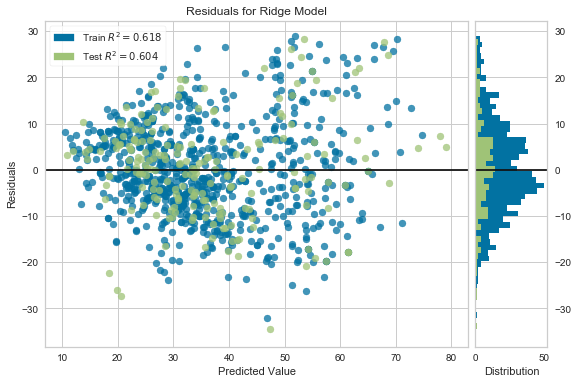

In [5]:
# Instantiate the linear model and visualizer 
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)      # Fit the training data to the visualizer
visualizer.score(X_test, y_test)      # Evaluate the model on the test data 
g = visualizer.poof()                 # Draw/show/poof the data

Yellowbrick's `ResidualsPlot` Visualizer also displays a histogram of the error values along the right-hand side. In the example above, the error is normally distributed around zero, which also generally indicates a well-fitted model. If the histogram is not desired, it can be turned off with the `hist=False` flag.

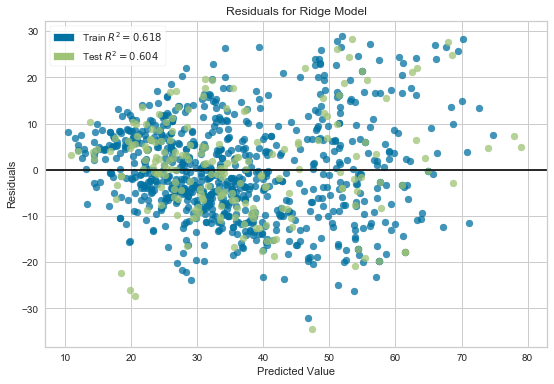

In [6]:
# Instantiate the linear model and visualizer 
model = Ridge()
visualizer = ResidualsPlot(model, hist=False)

visualizer.fit(X_train, y_train)      # Fit the training data to the visualizer
visualizer.score(X_test, y_test)      # Evaluate the model on the test data 
g = visualizer.poof()                 # Draw/show/poof the data

### Prediction Error Plot
Yellowbrick's `PredictionError` Visualizer plots the actual targets from the dataset against the predicted values generated by the model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45-degree line, where the prediction exactly matches the model.

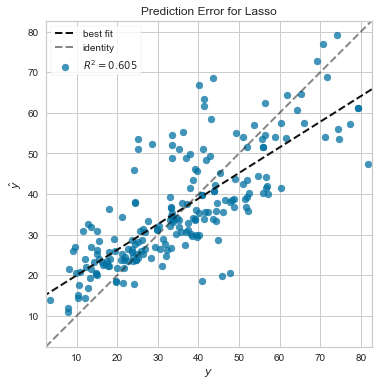

In [7]:
# Instantiate the linear model and visualizer 
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Alpha Selection Visualizer
The `AlphaSelection` Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. Since regularization is designed to penalize model complexity, the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). However, alphas that are too high increase the error due to bias (underfit). Therefore, it is important to choose an optimal alpha such that the error is minimized in both directions.

To do this, typically you would you use one of the "RegressionCV” models in scikit-learn. E.g. instead of using the Ridge (L2) regularizer, use `RidgeCV` and pass a list of alphas, which will be selected based on the cross-validation score of each alpha. This visualizer wraps a “RegressionCV” model and visualizes the alpha/error curve. If the visualization shows a jagged or random plot, then potentially the model is not sensitive to that type of regularization and another is required (e.g. L1 or Lasso regularization).

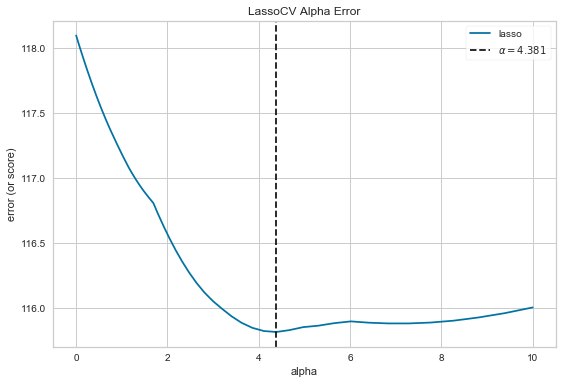

In [8]:
# Create a list of alphas to cross-validate against 
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer 
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)              # Fit the data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

That's it for now! If you're interested in learning more, please check out [Yellowbrick's documentation](http://www.scikit-yb.org/en/latest/index.html). I also posted a similar walkthrough on Yellowbrick's [clustering visualizers]({filename}/articles/clustering-notebook.ipynb) that you may find helpful.